# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from scipy import stats
from sklearn import metrics
import glob
import csv
import os
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Check if GPU is available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
    
interesting_dir = "./Data/Fastest/"
#interesting_files = ["sit.csv", "stand.csv", "walk.csv"]
interesting_labels = ['breaststroke', 'backstroke','rest']
save_filename = "activity"

C:\Users\farha\anaconda3\envs\tensorflow_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\farha\anaconda3\envs\tensorflow_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\farha\anaconda3\envs\tensorflow_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\farha\anaconda3\envs\tensorflow_gpu\l

Default GPU Device: /device:GPU:0


# Concate and label the raw data  

In [48]:
def data_concate_label(path,label):
    all_files1 = glob.glob(path + "/*.csv")
    
    li = []

    for filename in all_files1:
        df = pd.read_csv(filename, index_col=None, header=0)
        
#         df.loc[df['label'] != str(label)] = str(label)
            
#         if 'label' in df.columns :
#             pass
                
#         else:
        df['label'] = str(label)
            
        li.append(df)
        
    frame = pd.concat(li, axis=0, ignore_index=True)
#     frame = frame.drop_duplicates()
    
    if len(df.columns) == 19 :
        new_header =['DATE','TIME','ax','ay','az','gx','gy','gz','lx','ly','lz','mx','my','mz','ma','mg','ml','mm','label']
    
    else :
       
        new_header =['DATE','TIME','ax','ay','az','gx','gy','gz','ma','mg','label']
#     if label == 'fall':
#         frame = frame.drop_duplicates()
        
#         frame = frame.query("mg >= 10 ")
#     if label =='jump':
        
#         frame = frame.query("mg <= 6")
    
#     else : pass
    frame = frame[1000:13000]
    
    print(frame.shape)
    print(len(df.columns))
    frame.to_csv("./Data/Fastest/activity_"+str(label)+".csv",index = False,header=new_header)
    

In [49]:
path2 = r".\Data\Fastest\back"
label2 = "backstroke"
path1 = r".\Data\Fastest\breast"
label1 = "breaststroke"
path3 = r".\Data\Fastest\rest"
label3 = "rest"
data_concate_label(path1,label1)
data_concate_label(path2,label2)
data_concate_label(path3,label3)

(12000, 11)
11
(12000, 11)
11
(12000, 11)
11


# Concate all data into one .csv file

In [50]:
import copy

df = pd.DataFrame()
for i in range(len(interesting_labels)):
#     df_tmp = pd.read_csv(interesting_dir+save_filename+"_"+str(i+1)+'.csv',parse_dates=[['DATE', ' TIME']],header = 0)
    df_tmp = pd.read_csv(interesting_dir+save_filename+"_"+interesting_labels[i]+'.csv',header = 0)
    df = pd.concat([df, df_tmp])
    
print(len(df.columns))
# df['ts'] = df[['DATE_TIME']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)
# df = df.assign(DATE_TIME=df['ts'])
# if len(df.columns) == 19 :
drop_list = ['DATE','TIME','ma','mg']
# else :pass

# drop_list = ['DATE','TIME','ma','mg']
df = df.drop(drop_list, axis=1)
df = df.dropna()

# df.rename(columns = {'DATE_TIME':'ts'}, inplace = True) 
all_data_filename = "total.csv"
df.to_csv(interesting_dir+all_data_filename)

# df.reset_index(inplace = True) 
df

11


ax        ay        az        gx        gy        gz  \
0     -1.930132  9.531015  1.779099  1.112080 -0.688796 -0.683178   
1     -1.903787  9.478326  2.473654  1.112080 -0.688796 -0.683178   
2     -1.903787  9.478326  2.473654  1.031446 -0.799973 -0.589104   
3     -1.472683  9.483115  1.858135  1.031446 -0.799973 -0.589104   
4     -1.472683  9.483115  1.858135  0.890947 -0.997893 -0.431501   
...         ...       ...       ...       ...       ...       ...   
11995 -1.064806  0.296710  9.765109  0.015874 -0.007327 -0.006106   
11996 -1.064806  0.294317  9.796216  0.015874 -0.007327 -0.006106   
11997 -1.064806  0.294317  9.796216  0.009769 -0.010990 -0.008548   
11998 -1.019342  0.296710  9.824930  0.009769 -0.010990 -0.008548   
11999 -1.019342  0.296710  9.824930  0.020759 -0.007327 -0.008548   

              label  
0      breaststroke  
1      breaststroke  
2      breaststroke  
3      breaststroke  
4      breaststroke  
...             ...  
11995          rest  
11996          rest  
11997          rest  
11998          rest  
11999          rest  

[36000 rows x 7 columns]

In [51]:
# normalize

# df[df.columns[:-1]] = df[df.columns[:-1]].apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
# df

# Feature correlation (optional)

In [52]:
# use deepcopy to avoid other operation change value of df
df_cor = copy.deepcopy(df) 

features = df_cor.columns[0:-1]
df_cor["label"] = pd.factorize(df_cor.label)[0]
traindf = pd.DataFrame(df_cor,columns=features)
#print(df_cor["label"])
#print(traindf)

feature_name = list(traindf.columns)
print(feature_name)
y = df_cor['label']
X = traindf.copy()
X.isna().sum()
# X.dropna()
# X.fillna('mean')

['ax', 'ay', 'az', 'gx', 'gy', 'gz']


ax    0
ay    0
az    0
gx    0
gy    0
gz    0
dtype: int64

[0.17456383 0.18613258 0.14437249 0.1277985  0.16557893 0.20155367]


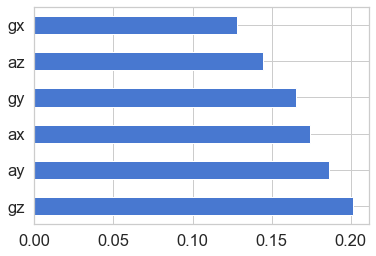

In [53]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

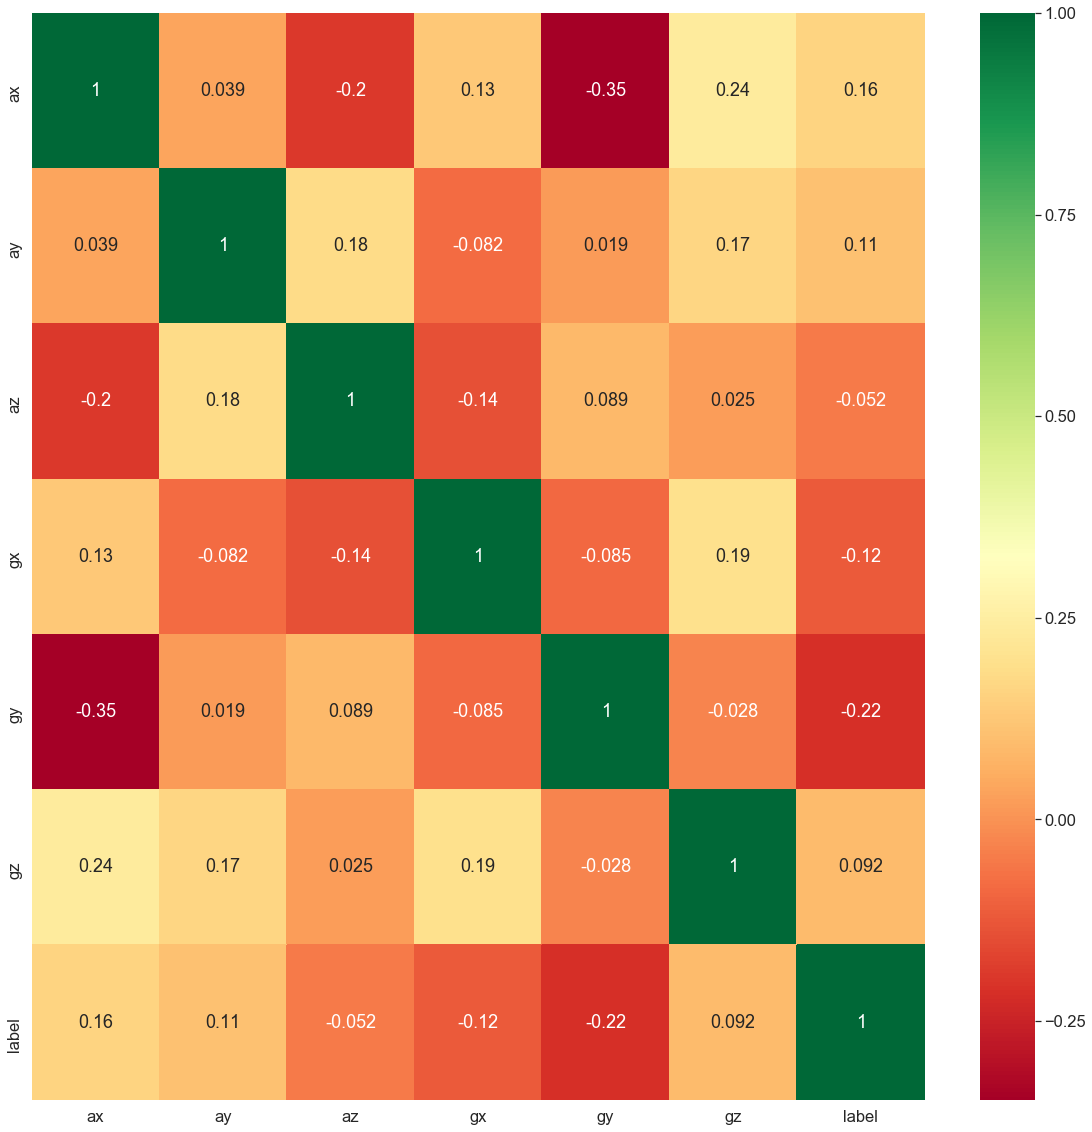

In [54]:
#get correlations of each features in dataset

corrmat = df_cor.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_cor[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [55]:
num_feats= len(feature_name)
X.columns.tolist()

['ax', 'ay', 'az', 'gx', 'gy', 'gz']

In [56]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
        
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
   
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]

    return cor_support, cor_feature, cor_list

cor_support, cor_feature, cor_list = cor_selector(X, y,num_feats)
cor_val=[abs(x) for x in cor_list]
cor_result = dict(zip(cor_feature, cor_val))
myDict = {key:val for key, val in cor_result.items() if val > 0}
{k: v for k, v in sorted(myDict.items(),reverse=True, key=lambda item: item[1])}

{'ax': 0.21617322356076865,
 'az': 0.16038225696664818,
 'gx': 0.11717639704960056,
 'gz': 0.10501660566217721,
 'gy': 0.09222834040679669,
 'ay': 0.052448916042099857}

In [57]:
df_plot = copy.deepcopy(df)
df_plot.reset_index(inplace = True) 


       index         ax        ay        az        gx        gy        gz  \
12200    200  10.962005 -6.840176  0.258662  2.329839 -1.199739 -1.998750   
12201    201  11.388318 -6.670130 -0.325723  2.329839 -1.199739 -1.998750   
12202    202  11.388318 -6.670130 -0.325723  2.481334 -1.264491 -2.017076   
12203    203  10.526112 -7.630533 -0.744851  2.481334 -1.264491 -2.017076   
12204    204  10.526112 -7.630533 -0.744851  2.796540 -1.415985 -1.965764   
...      ...        ...       ...       ...       ...       ...       ...   
15995   3995  -1.568738 -8.911868  3.669170  1.839925  1.240056  1.451415   
15996   3996  -1.611848 -8.293953  5.003196  1.839925  1.240056  1.451415   
15997   3997  -1.611848 -8.293953  5.003196  1.815491  1.444085  1.609018   
15998   3998  -2.294429 -7.170689  5.886958  1.815491  1.444085  1.609018   
15999   3999  -2.806963 -6.718030  6.603069  1.815491  1.444085  1.609018   

            label  
12200  backstroke  
12201  backstroke  
12202  backstro

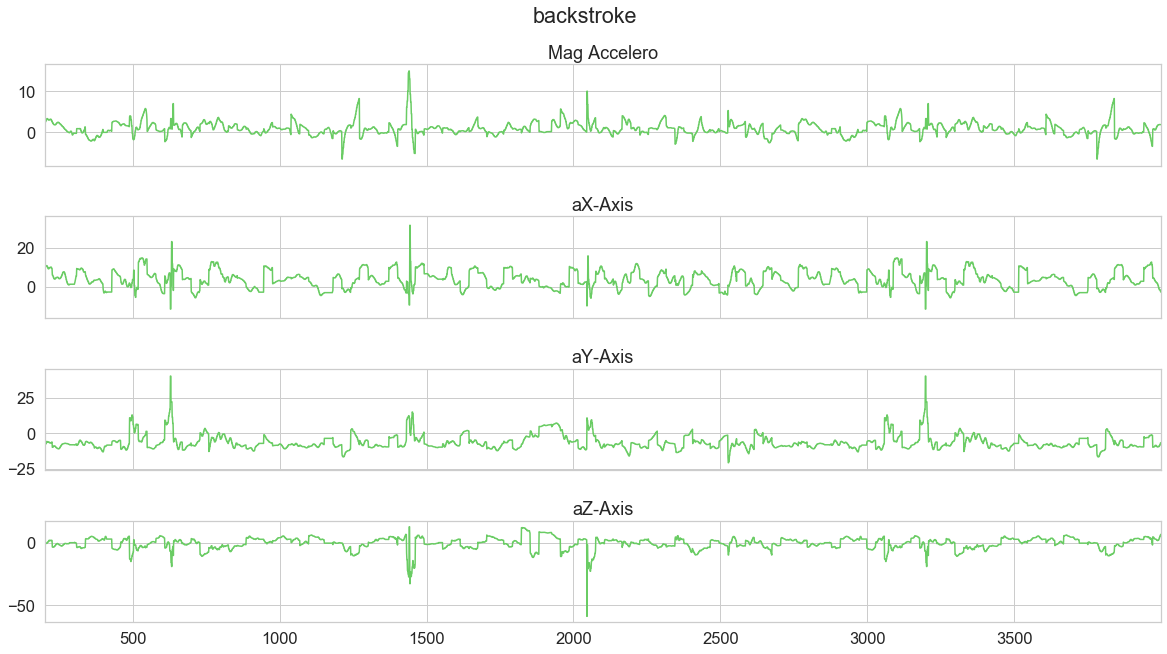

      index        ax        ay        az        gx        gy        gz  \
200     200  0.512788  4.812827  5.544070  0.833525 -0.488432  0.301537   
201     201  0.500813  5.162500  5.553650  0.833525 -0.488432  0.301537   
202     202  0.500813  5.162500  5.553650  1.314887 -0.068157  0.132938   
203     203  0.903176  5.555283  5.685376  1.314887 -0.068157  0.132938   
204     204  0.903176  5.555283  5.685376  1.614211  0.515830 -0.067426   
...     ...       ...       ...       ...       ...       ...       ...   
3995   3995 -0.648797 -6.453345  7.167893  3.990476  0.517052  1.398650   
3996   3996 -0.648797 -6.453345  7.167893  3.968485  0.519495  1.349781   
3997   3997 -1.357722 -7.040125  7.143943  3.968485  0.519495  1.349781   
3998   3998 -1.357722 -7.040125  7.143943  3.920837  0.482843  1.305799   
3999   3999 -1.546929 -7.523919  7.424160  3.920837  0.482843  1.305799   

             label  
200   breaststroke  
201   breaststroke  
202   breaststroke  
203   breaststr

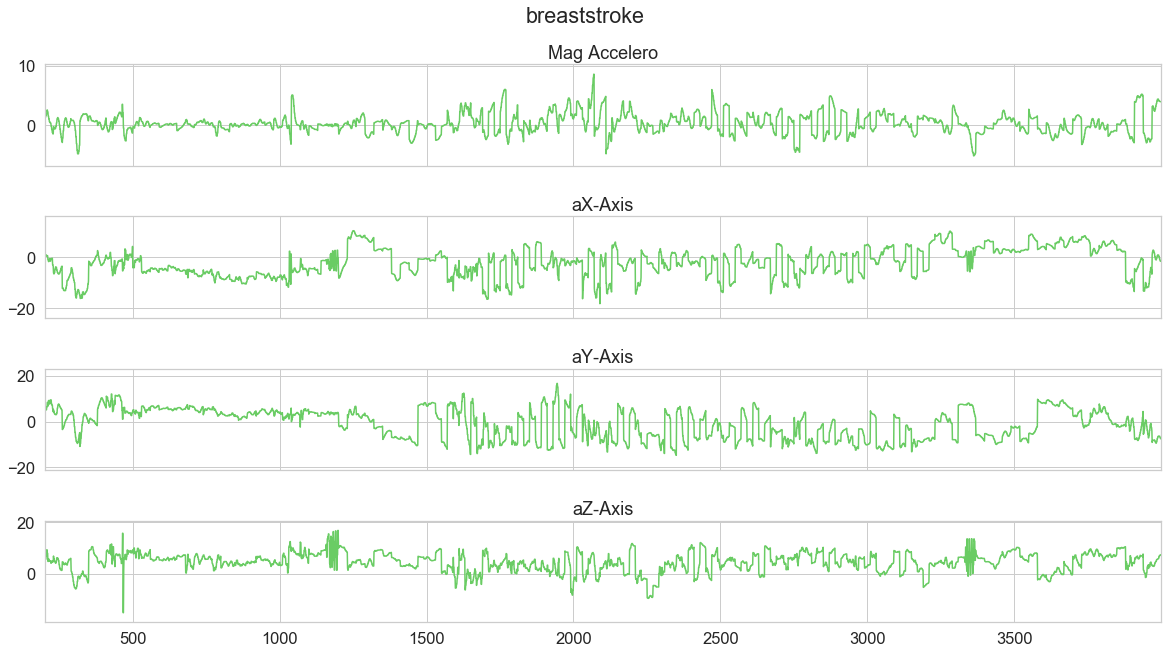

       index        ax        ay        az        gx        gy        gz label
24200    200  9.832109  0.172283  1.189233 -0.006106  0.015874 -0.017096  rest
24201    201  9.748360  0.165105  1.098306 -0.006106  0.015874 -0.017096  rest
24202    202  9.748360  0.165105  1.098306 -0.008548  0.015874 -0.020759  rest
24203    203  9.748360  0.153141  1.134198 -0.008548  0.015874 -0.020759  rest
24204    204  9.748360  0.153141  1.134198 -0.007327  0.017096 -0.015874  rest
...      ...       ...       ...       ...       ...       ...       ...   ...
27995   3995  9.896714  0.196211  1.019342  0.017096  0.002442 -0.004884  rest
27996   3996  9.894321  0.246461  0.990629  0.017096  0.002442 -0.004884  rest
27997   3997  9.894321  0.246461  0.990629  0.017096 -0.001221 -0.003663  rest
27998   3998  9.863214  0.253639  1.002593  0.017096 -0.001221 -0.003663  rest
27999   3999  9.863214  0.253639  1.002593  0.013432 -0.002442 -0.001221  rest

[3800 rows x 8 columns]
rest


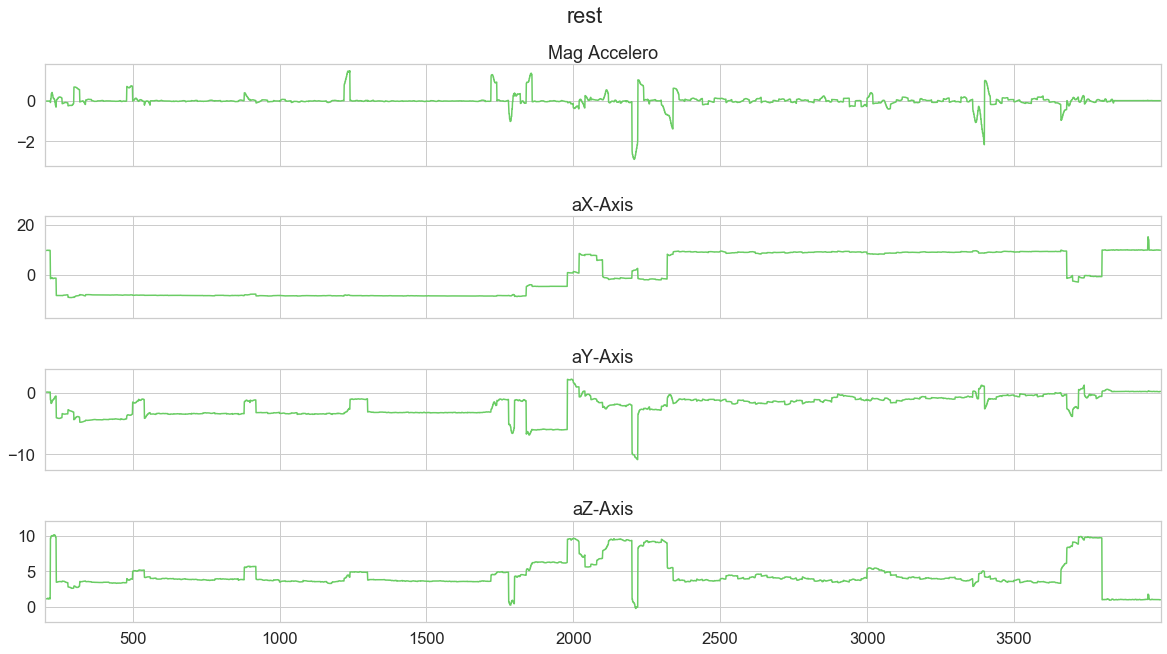

In [58]:
activities = df_plot['label'].value_counts().index
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2,ax3) = plt.subplots(nrows=4, figsize=(20, 10), sharex=True)
    plot_axis(ax0, data['index'], data['gx'], 'Mag Accelero')
    plot_axis(ax1, data['index'], data['ax'], 'aX-Axis')
    plot_axis(ax2, data['index'], data['ay'], 'aY-Axis')
    plot_axis(ax3, data['index'], data['az'], 'aZ-Axis')
    plt.subplots_adjust(hspace=0.5)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
#     ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
    
Fs=200
for activity in activities:
    data_for_plot = df_plot[(df_plot['label'] == activity)][200:4000]
    print(data_for_plot)
    print(activity)
    plot_activity(activity, data_for_plot)

# Split training and testing data

In [59]:
def train_test_split(label, ratio):
    split_point = int(len(df[df.label == label]) * ratio)
    return (df[df.label == label].iloc[:split_point, :], df[df.label == label].iloc[split_point:, :])

split_ratio = 0.75
train_data = pd.DataFrame([])
test_data = pd.DataFrame([])

for i in range(len(interesting_labels)):
    (train, test) = train_test_split(interesting_labels[i], split_ratio)
    train_data = pd.concat([train_data, train])
    test_data = pd.concat([test_data, test])

#print("Number of train samples/label: ", len(train_stand))
#print("Number of test samples/label: ", len(test_stand))

# train_data = train_data.iloc[18:,]
# test_data = test_data.iloc[74:,]
print("Number of train samples: ", len(train_data))
print("Number of test samples: ", len(test_data))

#train_label = train_data.iloc[:, 12]
#test_label = test_data.iloc[:, 12]
#train_label = train_label.to_frame()
#test_label = test_label.to_frame()

train_label = train_data['label'].to_frame()
test_label = test_data['label'].to_frame()

Number of train samples:  27000
Number of test samples:  9000


# Data Segmentation (Sliding Window)

In [60]:
N_TIME_STEPS = 100 #sliding window length
STEP = 20 #Sliding window step size
N_FEATURES = 6

def generate_sequence(x, y, n_time_steps, step):
    
    segments = []
    labels = []
    for i in range(0, len(x) - n_time_steps, step):
        ax = x['ax'].values[i: i + n_time_steps]
        ay = x['ay'].values[i: i + n_time_steps]
        az = x['az'].values[i: i + n_time_steps]

#         lx = x['lx'].values[i: i + n_time_steps]
#         ly = x['ly'].values[i: i + n_time_steps]
#         lz = x['lz'].values[i: i + n_time_steps]
        gx = x['gx'].values[i: i + n_time_steps]
        gy = x['gy'].values[i: i + n_time_steps]
        gz = x['gz'].values[i: i + n_time_steps]

# #         mx = x['mx'].values[i: i + n_time_steps]
# #         my = x['my'].values[i: i + n_time_steps]
# #         mz = x['mz'].values[i: i + n_time_steps]
        
#         ma =  x['ma'].values[i: i + n_time_steps]
#         mg =  x['mg'].values[i: i + n_time_steps]
#         ml =  x['ml'].values[i: i + n_time_steps]
#         mm =  x['mm'].values[i: i + n_time_steps]
                
       
        label = stats.mode(y['label'][i: i + n_time_steps])[0][0]
#         segments.append([ax, ay, az, gx, gy, gz, lx, ly, lz, mx, my, mz, ma, mg, ml, mm])
#         segments.append([ax, ay, az, gx, gy, gz, mx, my, mz])
#         segments.append([ax, ay, az, gx, gy, gz,ma,mg])
        segments.append([ax, ay, az, gx, gy, gz])
        labels.append(label)
        
    return segments, labels

train_X, train_y = generate_sequence(train_data, train_label, N_TIME_STEPS, STEP)
test_X, test_y = generate_sequence(test_data, test_label, N_TIME_STEPS, STEP)

In [61]:
# reshape input segments and one-hot encode labels
def reshape_segments(x, y, n_time_steps, n_features):
    
    x_reshaped = np.asarray(x, dtype= np.float32).reshape(-1, n_time_steps, n_features)
    y_reshaped = np.asarray(pd.get_dummies(y), dtype = np.float32)
    return x_reshaped, y_reshaped

X_train, y_train = reshape_segments(train_X, train_y, N_TIME_STEPS, N_FEATURES)
X_test, y_test = reshape_segments(test_X, test_y, N_TIME_STEPS, N_FEATURES)

In [62]:
y_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

# Import DL Library

In [63]:
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten, Bidirectional
from tensorflow.keras.layers import Attention
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras import optimizers
from keras import backend as K
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib

N_CLASSES = 3
N_HIDDEN_UNITS = 64
L2 = 0.000001

# LSTM Model (Training) 

In [64]:
class attention():
    
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(attention,self).__init__()
        
    def build(self, input_shape):
        
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="zeros")
        
        super(attention,self).build(input_shape)
        
    def call(self, x):
        
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        
        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)

In [65]:
# LSTM model
from keras.backend import clear_session

clear_session()
model = Sequential()
# model.add(Embedding(max_words, emb_dim, input_length=max_len))
# model.add(attention(return_sequences=True)) # receive 3D and output 3D
model.add(LSTM(64, return_sequences=True, input_shape=(N_TIME_STEPS, N_FEATURES), 
         kernel_initializer='orthogonal', kernel_regularizer=l2(L2), recurrent_regularizer=l2(L2),
         bias_regularizer=l2(L2), name="LSTM_1"))
model.add(Dropout(0.2))

# model.add(Bidirectional(LSTM(32, return_sequences=True)))

# model.add(LSTM(32, return_sequences=True))

model.add(Bidirectional(LSTM(16, return_sequences=True)))

model.add(Flatten(name='Flatten'))
model.add(Dense(N_HIDDEN_UNITS, activation='relu', kernel_regularizer=l2(L2), bias_regularizer=l2(L2), name="Dense_1"))
model.add(Dense(N_CLASSES, activation='softmax', kernel_regularizer=l2(L2), bias_regularizer=l2(L2), name="Dense_2"))

#     LSTM(N_HIDDEN_UNITS, return_sequences=True, input_shape=(N_TIME_STEPS, N_FEATURES), 
#          kernel_initializer='orthogonal', kernel_regularizer=l2(L2), recurrent_regularizer=l2(L2),
#          bias_regularizer=l2(L2), name="LSTM_1"),
#     LSTM(N_HIDDEN_UNITS, return_sequences=True, input_shape=(N_TIME_STEPS, N_FEATURES), 
#          kernel_initializer='orthogonal', kernel_regularizer=l2(L2), recurrent_regularizer=l2(L2),
#          bias_regularizer=l2(L2), name="LSTM_2"),
#     Dropout(0.2),
#     Flatten(name='Flatten'),
#     Dense(N_HIDDEN_UNITS, activation='relu', kernel_regularizer=l2(L2), bias_regularizer=l2(L2), name="Dense_1"),
#     Dense(N_CLASSES, activation='softmax', kernel_regularizer=l2(L2), bias_regularizer=l2(L2), name="Dense_2")
# ])

# model = Sequential([
#     LSTM(N_HIDDEN_UNITS, return_sequences=True, input_shape=(N_TIME_STEPS, N_FEATURES), name="LSTM_1"),
#      LSTM(N_HIDDEN_UNITS, return_sequences=True, input_shape=(N_TIME_STEPS, N_FEATURES), name="LSTM_2"),
#     Flatten(name='Flatten'),
#     Dense(N_HIDDEN_UNITS, activation='relu', name="Dense_1"),
#     Dense(N_CLASSES, activation='softmax', name="Dense_2")
# ])

model.summary()

opt = optimizers.RMSprop(lr=0.0001)

model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

BATCH_SIZE =64
N_EPOCHS = 20

lstm = model.fit(X_train, y_train,
          batch_size=BATCH_SIZE, epochs=N_EPOCHS,
          validation_data=(X_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
LSTM_1 (LSTM)                (None, 100, 64)           18176     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 64)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 32)           10368     
_________________________________________________________________
Flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
Dense_1 (Dense)              (None, 64)                204864    
_________________________________________________________________
Dense_2 (Dense)              (None, 3)                 195       
Total params: 233,603
Trainable params: 233,603
Non-trainable params: 0
_________________________________________________________________
Trai

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


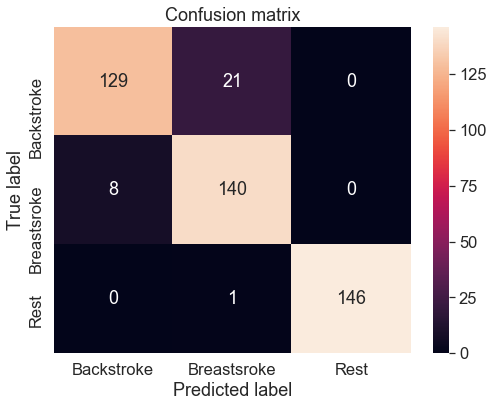

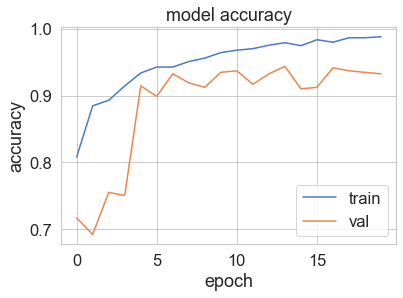

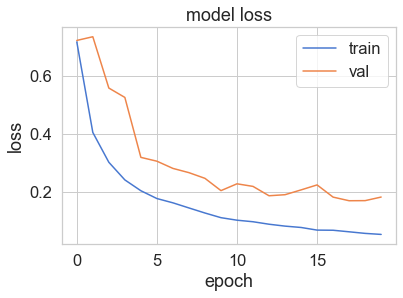

In [67]:
# use LSTM model to predict

y_pred_ohe = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels)
print(y_true_labels)
LABELS = [ 'Backstroke','Breastsroke','Rest']

plt.figure(figsize=(8, 6))
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
# plt.ylim((16,14))
plt.xlabel('Predicted label')
plt.show();

plt.plot(lstm.history['acc'])
plt.plot(lstm.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

plt.plot(lstm.history['loss'])
plt.plot(lstm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

# Save the model into .pb file

In [26]:
# N_TIME_STEPS = 100 #sliding window length
# STEP = 20 #Sliding window step size
# N_FEATURES = 8


In [68]:
# Save LSTM model

output_node_name = "Dense_2/Softmax"
MODEL_LSTM = str(N_TIME_STEPS)+"_"+str(STEP)+"_"+str(N_FEATURES)+"_"+str(N_CLASSES)+"_nomag"

tf.train.write_graph(K.get_session().graph_def, './models/LSTM/', \
        MODEL_LSTM + '_graph.pbtxt')
saver = tf.train.Saver()
saver.save(K.get_session(), './models/LSTM/' + MODEL_LSTM + '.chkp')

freeze_graph.freeze_graph('./models/LSTM/' +MODEL_LSTM+ '_graph.pbtxt', None, \
    False, './models/LSTM/' + MODEL_LSTM+ '.chkp', output_node_name, \
    "save/restore_all", "save/Const:0", \
    './models/LSTM/' +MODEL_LSTM + '.pb', True, "")



INFO:tensorflow:Restoring parameters from ./models/LSTM/100_20_6_3_nomag.chkp
INFO:tensorflow:Froze 13 variables.
INFO:tensorflow:Converted 13 variables to const ops.


node {
  name: "keras_learning_phase/input"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_BOOL
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_BOOL
        tensor_shape {
        }
        bool_val: false
      }
    }
  }
}
node {
  name: "keras_learning_phase"
  op: "PlaceholderWithDefault"
  input: "keras_learning_phase/input"
  attr {
    key: "dtype"
    value {
      type: DT_BOOL
    }
  }
  attr {
    key: "shape"
    value {
      shape {
      }
    }
  }
}
node {
  name: "LSTM_1_input"
  op: "Placeholder"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "shape"
    value {
      shape {
        dim {
          size: -1
        }
        dim {
          size: 100
        }
        dim {
          size: 6
        }
      }
    }
  }
}
node {
  name: "LSTM_1/kernel"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
  

# CNN Model 

In [ ]:
# from keras.backend import clear_session

# clear_session()
# # CNN model

# model = Sequential()

# model.add(Conv2D(N_HIDDEN_UNITS * 3, kernel_size = 3, input_shape = (X_train.shape[1], X_train.shape[2], 1), padding = 'same',
#                  activation = 'relu', name="Conv2D_Layer1"))
# model.add(Conv2D(N_HIDDEN_UNITS * 2, kernel_size = 3, padding = 'same', activation = 'relu', name="Conv2D_Layer2"))
# model.add(Conv2D(N_HIDDEN_UNITS, kernel_size = 3, padding = 'same', activation = 'relu', name="Conv2D_Layer3"))
# model.add(Flatten(name="Flatten_Layer"))
# model.add(Dense(N_CLASSES, activation = 'softmax', name="CNN_output"))

# model.summary()

# model.compile(optimizer='Adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# BATCH_SIZE = 24
# N_EPOCHS = 100

# cnn = model.fit(np.expand_dims(X_train, axis=-1), y_train,
#                 batch_size=BATCH_SIZE, epochs=N_EPOCHS,
#                 validation_data=(np.expand_dims(X_test, axis=-1), y_test))

In [ ]:
# model.save("model_har.h5")

In [ ]:
# y_pred_ohe = model.predict(np.expand_dims(X_test, axis=-1))
# y_pred_labels = np.argmax(y_pred_ohe, axis=1)
# y_true_labels = np.argmax(y_test, axis=1)
# confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels)

# LABELS = [ 'standing', 'walking']

# plt.figure(figsize=(8, 6))
# sns.set(style='whitegrid', palette='muted', font_scale=1.5)
# sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
# plt.title("CNN Result Confusion Matrix")
# plt.ylabel('True label')
# # plt.ylim((16,14))
# plt.xlabel('Predicted label')
# plt.show();

# plt.plot(cnn.history['acc'])
# plt.plot(cnn.history['val_acc'])
# plt.title('CNN model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='best')
# plt.show()

# plt.plot(cnn.history['loss'])
# plt.plot(cnn.history['val_loss'])
# plt.title('CNN model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='best')
# plt.show()

# Save model to .pb file

In [ ]:
# # Save CNN model
# output_node_name = "CNN_output/Softmax"
# MODEL_NAME = "2020_02_09_CNN"

# tf.train.write_graph(K.get_session().graph_def, './models/CNN/', \
#         MODEL_NAME + '_graph.pbtxt')
# saver = tf.train.Saver()
# saver.save(K.get_session(), './models/CNN/' + MODEL_NAME + '.chkp')

# freeze_graph.freeze_graph('./models/CNN/' + MODEL_NAME + '_graph.pbtxt', None, \
#     False, './models/CNN/' + MODEL_NAME + '.chkp', output_node_name, \
#     "save/restore_all", "save/Const:0", \
#     './models/CNN/' + MODEL_NAME + '.pb', True, "")

# Convert .pb to tflite

In [ ]:
# import tensorflow as tf
# # model_dir='./models/CNN/2020_02_09_CNN.pb'
# model_dir='model_har.h5'

# input_arrays = ['Conv2D_Layer1_input']
# output_arrays = ['CNN_output/Softmax']

# tfc = tf.lite.TFLiteConverter.from_keras_model_file(model_dir)
# # converter =  tfc.from_keras_model_file(model_dir, input_arrays, output_arrays)

# tflite_model = tfc.convert()
# open("CNN_model.tflite","wb").write(tflite_model)

# Make sure the model output and input name

In [ ]:
# import tensorflow as tf
# gf = tf.GraphDef()   
# m_file = open(r"D:\Human Activity Recognition\Training\models\LSTM\100_12_walk_stand.pb",'rb')
# gf.ParseFromString(m_file.read())

# with open('somefile.txt', 'a') as the_file:
#     for n in gf.node:
#         the_file.write(n.name+'\n')

# file = open('somefile.txt','r')
# data = file.readlines()
# print ("output name = ")
# print (data[len(data)-1])

# print ("Input name = ")
# file.seek ( 0 )
# print (file.readline())